<a href="https://colab.research.google.com/github/joaochenriques/WE_LAB_2023/blob/main/DataCorrection/OWC_CamerasDataCorrection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import h5py
import matplotlib.pyplot as mpl
import numpy as np
import pandas as pd
import scipy.signal
from dataclasses import dataclass, field
import os, pathlib
from scipy import interpolate
import glob

In [2]:
import subprocess

def cmdcall( cmd ):
    output = subprocess.getoutput( cmd )
    print(output)

In [3]:
if not pathlib.Path("mpl_utils.py").exists():
  cmdcall( "curl -O https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py" ) 

import mpl_utils as mut
mut.config_plots()

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

mpl.rcParams["figure.figsize"] = (6,4.5)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  3921  100  3921    0     0   9851      0 --:--:-- --:--:-- --:--:--  9851


In [4]:
if not pathlib.Path("YB2m_Tests_V6.h5").exists():
    cmdcall( "curl -O https://raw.githubusercontent.com/joaochenriques/WE_LAB_2023/main/YB2m_Tests_V6.zip" )
    cmdcall( "unzip YB2m_Tests_V6.zip" )

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 4604k    0  7751    0     0  10066      0  0:07:48 --:--:--  0:07:48 10053
100 4604k  100 4604k    0     0  5353k      0 --:--:-- --:--:-- --:--:-- 5347k
Archive:  YB2m_Tests_V6.zip
  inflating: YB2m_Tests_V6.h5        


In [20]:
if not pathlib.Path("YB2m_Cameras_V6.zip").exists():
    cmdcall( "curl -O https://raw.githubusercontent.com/joaochenriques/WE_LAB_2023/main/DataCorrection/YB2m_Cameras_V6.zip" )
    cmdcall( "unzip YB2m_Cameras_V6.zip" )

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 10.0M    0  7749    0     0   8648      0  0:20:19 --:--:--  0:20:19  8638
100 10.0M  100 10.0M    0     0   9.9M      0  0:00:01  0:00:01 --:--:--  9.9M
Archive:  YB2m_Cameras_V6.zip
  inflating: YB2m_H0.02m_f0.64Hz.csv  
  inflating: YB2m_H0.02m_f0.70Hz.csv  
  inflating: YB2m_H0.02m_f0.74Hz.csv  
  inflating: YB2m_H0.02m_f0.76Hz.csv  
  inflating: YB2m_H0.02m_f0.80Hz.csv  
  inflating: YB2m_H0.02m_f0.84Hz.csv  
  inflating: YB2m_H0.02m_f0.88Hz.csv  
  inflating: YB2m_H0.02m_f0.90Hz.csv  
  inflating: YB2m_H0.02m_f0.92Hz.csv  
  inflating: YB2m_H0.02m_f0.96Hz.csv  
  inflating: YB2m_H0.02m_f1.00Hz.csv  
  inflating: YB2m_H0.02m_f1.02Hz.csv  
  inflating: YB2m_H0.02m_f1.04Hz.csv  
  inflating: YB2m_H0.02m_f1.06Hz.csv  
  inflating: YB2m_H0.02m_f1.

In [6]:
if not pathlib.Path("KB4m_Tests_V6.h5").exists():
    cmdcall( "curl -O https://raw.githubusercontent.com/joaochenriques/WE_LAB_2023/main/KB4m_Tests_V6.zip" )
    cmdcall( "unzip KB4m_Tests_V6.zip" )

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2189k  100 2189k    0     0  4162k      0 --:--:-- --:--:-- --:--:-- 4162k
Archive:  KB4m_Tests_V6.zip
  inflating: KB4m_Tests_V6.h5        


In [21]:
if not pathlib.Path("KB4m_Cameras_V6.zip").exists():
    cmdcall( "curl -O https://raw.githubusercontent.com/joaochenriques/WE_LAB_2023/main/DataCorrection/KB4m_Cameras_V6.zip" )
    cmdcall( "unzip KB4m_Cameras_V6.zip" )

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 7056k    0  7678    0     0   8474      0  0:14:12 --:--:--  0:14:12  8465
100 7056k  100 7056k    0     0  6993k      0  0:00:01  0:00:01 --:--:-- 6993k
Archive:  KB4m_Cameras_V6.zip
  inflating: KB4m_H0.04m_f0.64Hz.csv  
  inflating: KB4m_H0.04m_f0.70Hz.csv  
  inflating: KB4m_H0.04m_f0.74Hz.csv  
  inflating: KB4m_H0.04m_f0.78Hz.csv  
  inflating: KB4m_H0.04m_f0.82Hz.csv  
  inflating: KB4m_H0.04m_f0.86Hz.csv  
  inflating: KB4m_H0.04m_f0.90Hz.csv  
  inflating: KB4m_H0.04m_f0.94Hz.csv  
  inflating: KB4m_H0.04m_f1.00Hz.csv  
  inflating: KB4m_H0.04m_f1.02Hz.csv  
  inflating: KB4m_H0.04m_f1.04Hz.csv  
  inflating: KB4m_H0.04m_f1.06Hz.csv  
  inflating: KB4m_H0.04m_f1.08Hz.csv  
  inflating: KB4m_H0.04m_f1.10Hz.csv  
  inflating: KB4m_H0.04m_f1.

In [8]:
def read_hdf_array( hdf5_Input, group, name ):
    return np.array( hdf5_Input[ group + '/' + name ] )

def read_hdf_scalar( hdf5_Input, group, name ):
    return hdf5_Input[ group + '/' + name ][()]

def read_hdf_string( hdf5_Input, group, name ):
    return hdf5_Input[ group + '/' + name ][()]

def save_hdf_array( hdf5_Output, group, name, fdata ):
    hdf5_Output.create_dataset( group + '/' + name, data=fdata, 
                                compression="gzip", compression_opts=9  )

def save_hdf_scalar( hdf5_Output, group, name, fdata ):
    hdf5_Output.create_dataset( group + '/' + name, data=fdata )

def save_hdf_string( hdf5_Output, group, name, fdata ):
    hdf5_Output.create_dataset( group + '/' + name, data=fdata, 
                                dtype=save_hdf_string.dt_str )
save_hdf_string.dt_str = h5py.special_dtype( vlen=bytes )

In [9]:
hf = h5py.File( 'YB2m_Tests_V5.h5', 'a' )
filenames = []
cases_names = list( hf.keys() )
for case_name in cases_names:
    var_entry = case_name + '/CamerasFileName'
    if var_entry in hf:
        filename = read_hdf_string( hf, case_name, 'CamerasFileName' ).decode()

        if os.path.isfile( './' + filename ):
            print( "Found: " + filename )
            filenames.append( filename )
        else:
            print( "NOT Found: " + filename )
            # del hf[ case_name + '/CamerasFileName' ]
            # save_hdf_string( hf, case_name, 'CamerasFileName', 'YB2m_H0.02m_f0.60Hz.csv' )

hf.close()

In [10]:
def interpolate_nans(A):
    inds = np.arange( A.shape[0] )
    good = np.where( np.isfinite(A) )
    f = interpolate.interp1d( inds[good], A[good], bounds_error=False )
    B = np.where( np.isfinite(A), A, f(inds) )
    return B

In [22]:
filenames = sorted( [ f for f in glob.glob("*.csv") ] )
filenames

['KB4m_H0.04m_f0.64Hz.csv',
 'KB4m_H0.04m_f0.70Hz.csv',
 'KB4m_H0.04m_f0.74Hz.csv',
 'KB4m_H0.04m_f0.78Hz.csv',
 'KB4m_H0.04m_f0.82Hz.csv',
 'KB4m_H0.04m_f0.86Hz.csv',
 'KB4m_H0.04m_f0.90Hz.csv',
 'KB4m_H0.04m_f0.94Hz.csv',
 'KB4m_H0.04m_f1.00Hz.csv',
 'KB4m_H0.04m_f1.02Hz.csv',
 'KB4m_H0.04m_f1.04Hz.csv',
 'KB4m_H0.04m_f1.06Hz.csv',
 'KB4m_H0.04m_f1.08Hz.csv',
 'KB4m_H0.04m_f1.10Hz.csv',
 'KB4m_H0.04m_f1.12Hz.csv',
 'KB4m_H0.04m_f1.14Hz.csv',
 'KB4m_H0.04m_f1.16Hz.csv',
 'KB4m_H0.04m_f1.18Hz.csv',
 'KB4m_H0.04m_f1.22Hz.csv',
 'KB4m_H0.04m_f1.28Hz.csv',
 'KB4m_H0.04m_f1.34Hz.csv',
 'KB4m_H0.04m_f1.42Hz.csv',
 'KB4m_H0.04m_f1.50Hz.csv',
 'YB2m_H0.02m_f0.64Hz.csv',
 'YB2m_H0.02m_f0.70Hz.csv',
 'YB2m_H0.02m_f0.74Hz.csv',
 'YB2m_H0.02m_f0.76Hz.csv',
 'YB2m_H0.02m_f0.80Hz.csv',
 'YB2m_H0.02m_f0.84Hz.csv',
 'YB2m_H0.02m_f0.88Hz.csv',
 'YB2m_H0.02m_f0.90Hz.csv',
 'YB2m_H0.02m_f0.92Hz.csv',
 'YB2m_H0.02m_f0.96Hz.csv',
 'YB2m_H0.02m_f1.00Hz.csv',
 'YB2m_H0.02m_f1.02Hz.csv',
 'YB2m_H0.02m_f1.04H

In [26]:
for i, filename in enumerate( filenames ):
    df = pd.read_csv( filename, skiprows=(0,1,2,3,4,5,6), header=None )

    times = np.array( df[1] )

    roll  = np.array( df[2] )
    yaw   = np.array( df[3] )
    pitch = np.array( df[4] )
    surge = np.array( df[5] )
    heave = np.array( df[6] )
    sway  = np.array( df[7] )    

    if np.count_nonzero( np.isnan(roll) ) > 0:
        roll  = interpolate_nans( roll  )
        yaw   = interpolate_nans( yaw   )
        pitch = interpolate_nans( pitch )
        surge = interpolate_nans( surge )
        heave = interpolate_nans( heave )
        sway  = interpolate_nans( sway  )

    n = np.count_nonzero(~np.isnan(roll))
    print( str(i) + ': ' + filename + ' -- ' + str( len(roll) - n) )


    data = {   
        "time": times, 
        "surge" : surge, 
        "heave" : heave, 
        "sway"  : sway, 
        "roll"  : roll, 
        "yaw"   : yaw, 
        "pitch" : pitch
        }


0: KB4m_H0.04m_f0.64Hz.csv -- 0
1: KB4m_H0.04m_f0.70Hz.csv -- 0
2: KB4m_H0.04m_f0.74Hz.csv -- 0
3: KB4m_H0.04m_f0.78Hz.csv -- 0
4: KB4m_H0.04m_f0.82Hz.csv -- 0
5: KB4m_H0.04m_f0.86Hz.csv -- 0
6: KB4m_H0.04m_f0.90Hz.csv -- 0
7: KB4m_H0.04m_f0.94Hz.csv -- 0
8: KB4m_H0.04m_f1.00Hz.csv -- 0
9: KB4m_H0.04m_f1.02Hz.csv -- 0
10: KB4m_H0.04m_f1.04Hz.csv -- 0
11: KB4m_H0.04m_f1.06Hz.csv -- 0
12: KB4m_H0.04m_f1.08Hz.csv -- 0
13: KB4m_H0.04m_f1.10Hz.csv -- 0
14: KB4m_H0.04m_f1.12Hz.csv -- 0
15: KB4m_H0.04m_f1.14Hz.csv -- 0
16: KB4m_H0.04m_f1.16Hz.csv -- 0
17: KB4m_H0.04m_f1.18Hz.csv -- 0
18: KB4m_H0.04m_f1.22Hz.csv -- 0
19: KB4m_H0.04m_f1.28Hz.csv -- 0
20: KB4m_H0.04m_f1.34Hz.csv -- 0
21: KB4m_H0.04m_f1.42Hz.csv -- 0
22: KB4m_H0.04m_f1.50Hz.csv -- 0
23: YB2m_H0.02m_f0.64Hz.csv -- 0
24: YB2m_H0.02m_f0.70Hz.csv -- 0
25: YB2m_H0.02m_f0.74Hz.csv -- 0
26: YB2m_H0.02m_f0.76Hz.csv -- 0
27: YB2m_H0.02m_f0.80Hz.csv -- 0
28: YB2m_H0.02m_f0.84Hz.csv -- 0
29: YB2m_H0.02m_f0.88Hz.csv -- 0
30: YB2m_H0.02m_f0.9

In [12]:
!zip YB2m_Cameras_V6.zip *.csv

	zip warning: missing end signature--probably not a zip file (did you
	zip warning: remember to use binary mode when you transferred it?)
	zip warning: (if you are trying to read a damaged archive try -F)

zip error: Zip file structure invalid (YB2m_Cameras_V6.zip)


In [13]:
hf = h5py.File( 'YB4m_Tests_V5.h5', 'a' )
filenames = []
cases_names = list( hf.keys() )
for case_name in cases_names:
    var_entry = case_name + '/CamerasFileName'
    if var_entry in hf:
        filename = read_hdf_string( hf, case_name, 'CamerasFileName' ).decode()

        if os.path.isfile( './' + filename ):
            print( "Found: " + filename )
            filenames.append( filename )
        else:
            print( "NOT Found: " + filename )
            # del hf[ case_name + '/CamerasFileName' ]
            # save_hdf_string( hf, case_name, 'CamerasFileName', 'YB2m_H0.02m_f0.60Hz.csv' )

hf.close()

In [14]:
for filename in filenames:
    df = pd.read_csv( filename, skiprows=(0,1,2,3,4,5,6), header=None )
    df.keys()
    valid = True
    data = np.array(df[2])
    n = np.count_nonzero(~np.isnan(data))
    print( filename + ' -- ' + str(len(data)) + ' -- ' + str(n) )

KB4m_H0.04m_f1.34Hz.csv


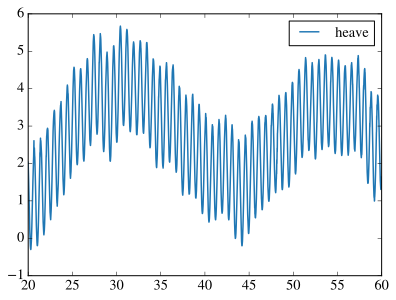

In [38]:
filename = filenames[20]

df = pd.read_csv( filename, skiprows=(0,1,2,3,4,5,6), header=None )
print( filename )

times = np.array( df[1] )

roll  = np.array( df[2] )
yaw   = np.array( df[3] )
pitch = np.array( df[4] )
surge = np.array( df[5] )
heave = np.array( df[6] )
sway  = np.array( df[7] )    

if np.count_nonzero( np.isnan(roll) ) > 0:
    roll  = interpolate_nans( roll  )
    yaw   = interpolate_nans( yaw   )
    pitch = interpolate_nans( pitch )
    surge = interpolate_nans( surge )
    heave = interpolate_nans( heave )
    sway  = interpolate_nans( sway  )

roll -= np.mean( roll )
surge -= np.mean( surge )
sway -= np.mean( sway )

# pitch /= np.max( pitch )
surge /= np.max( surge )
sway /= np.max( sway )
                 
# mpl.plot( times, surge, label='surge' )
# mpl.plot( times, sway, label='sway' )
mpl.plot( times, pitch, label='heave' )
mpl.xlim( (20, 60) )
mpl.legend();